# Main Problem
AtliQ Mart is facing a problem where a few key customers still need to extend their annual contracts due to service issues. It is speculated that some of the essential products were either not delivered on time or not delivered in total over a continued period, which could have resulted in bad customer service. Management wants to fix this issue before expanding to other cities and requested their supply chain analytics team to track the ’On time’ and ‘In Full’ delivery service level for all the customers daily so that they can respond swiftly to these issues.

In [1]:
# Import packages
import numpy as np
import pandas as pd

In [2]:
# Import CVS files into dataframes

customers = pd.read_csv('dim_customers.csv')
date = pd.read_csv('dim_date.csv')
products = pd.read_csv('dim_products.csv')
targets_orders = pd.read_csv('dim_targets_orders.csv')
order_lines = pd.read_csv('fact_order_lines.csv')
orders_aggregate = pd.read_csv('fact_orders_aggregate.csv')

In [3]:
# Check for missing values
print(customers.isna().sum())
print(date.isna().sum())
print(products.isna().sum())
print(targets_orders.isna().sum())
print(order_lines.isna().sum())
print(orders_aggregate.isna().sum())

customer_id      0
customer_name    0
city             0
dtype: int64
date       0
mmm_yy     0
week_no    0
dtype: int64
product_name    0
product_id      0
category        0
dtype: int64
customer_id       0
ontime_target%    0
infull_target%    0
otif_target%      0
dtype: int64
order_id                0
order_placement_date    0
customer_id             0
product_id              0
order_qty               0
agreed_delivery_date    0
actual_delivery_date    0
delivery_qty            0
In Full                 0
On Time                 0
On Time In Full         0
dtype: int64
order_id                0
customer_id             0
order_placement_date    0
on_time                 0
in_full                 0
otif                    0
dtype: int64


In [4]:
# Check any duplicates
print("# of duplicates in dim_customers:" + str(sum(customers.duplicated())))
print("# of duplicates in dim_date:" + str(sum(date.duplicated())))
print("# of duplicates in dim_products:" + str(sum(products.duplicated())))
print("# of duplicates in dim_targets_orders:" + str(sum(targets_orders.duplicated())))
print("# of duplicates in fact_order_lines:" + str(sum(order_lines.duplicated())))
print("# of duplicates in fact_orders_aggregate:" + str(sum(orders_aggregate.duplicated())))

# of duplicates in dim_customers:0
# of duplicates in dim_date:0
# of duplicates in dim_products:0
# of duplicates in dim_targets_orders:0
# of duplicates in fact_order_lines:0
# of duplicates in fact_orders_aggregate:0


In [5]:
customers.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


In [6]:
date.head()

,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14
1,03-Apr-22,01-Apr-22,W 15
2,04-Apr-22,01-Apr-22,W 15
3,05-Apr-22,01-Apr-22,W 15
4,06-Apr-22,01-Apr-22,W 15


In [7]:
products.head()

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy


In [8]:
products['product_name'].unique()

array(['AM Milk 500', 'AM Milk 250', 'AM Milk 100', 'AM Butter 100',
       'AM Butter 250', 'AM Butter 500', 'AM Ghee 250', 'AM Ghee 150',
       'AM Ghee 100', 'AM Curd 250', 'AM Curd 100', 'AM Curd 50',
       'AM Biscuits 750', 'AM Biscuits 500', 'AM Biscuits 250',
       'AM Tea 500', 'AM Tea 250', 'AM Tea 100'], dtype=object)

In [9]:
targets_orders.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [10]:
order_lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1


In [11]:
orders_aggregate.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0


In [16]:
df_order_products = pd.merge(order_lines, products, on='product_id', how='right')

In [17]:
def extract_target_word(product_name, target_word):
    if target_word.lower() in product_name.lower():
        return target_word
    else:
        return None

def add_target_word_column(df, target_word):
    df['target_word'] = df['product_name'].apply(lambda x: extract_target_word(x, target_word))
    return df

# Example usage:




In [18]:
products['product_name'].unique()

array(['AM Milk 500', 'AM Milk 250', 'AM Milk 100', 'AM Butter 100',
       'AM Butter 250', 'AM Butter 500', 'AM Ghee 250', 'AM Ghee 150',
       'AM Ghee 100', 'AM Curd 250', 'AM Curd 100', 'AM Curd 50',
       'AM Biscuits 750', 'AM Biscuits 500', 'AM Biscuits 250',
       'AM Tea 500', 'AM Tea 250', 'AM Tea 100'], dtype=object)

In [20]:
def extract_target_word(product_name, target_words):
    for target_word in target_words:
        if target_word.lower() in product_name.lower():
            return target_word
    return None

def add_target_word_column(df, target_words):
    df['target_word'] = df['product_name'].apply(lambda x: extract_target_word(x, target_words))
    return df

# Example usage:
target_words = ['Milk', 'Butter', 'Ghee', 'Curd', 'Biscuits', 'Tea']
order_lines = add_target_word_column(df_order_products, target_words)


In [21]:
order_lines.to_excel('order_lines.xlsx', index=False)


In [22]:
order_lines

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,product_name,category,target_word
0,FMR33501401,"Tuesday, March 1, 2022",789501,25891101,484,"Thursday, March 3, 2022","Thursday, March 3, 2022",484,1,1,1,AM Milk 500,Dairy,Milk
1,FMR32101601,"Tuesday, March 1, 2022",789101,25891101,474,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",474,1,1,1,AM Milk 500,Dairy,Milk
2,FMR33101403,"Tuesday, March 1, 2022",789101,25891101,349,"Thursday, March 3, 2022","Thursday, March 3, 2022",349,1,1,1,AM Milk 500,Dairy,Milk
3,FMR32703401,"Tuesday, March 1, 2022",789703,25891101,492,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",492,1,1,1,AM Milk 500,Dairy,Milk
4,FMR33321602,"Tuesday, March 1, 2022",789321,25891101,345,"Thursday, March 3, 2022","Thursday, March 3, 2022",345,1,1,1,AM Milk 500,Dairy,Milk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57091,FAUG831402603,"Tuesday, August 30, 2022",789402,25891603,111,"Wednesday, August 31, 2022","Wednesday, August 31, 2022",111,1,1,1,AM Tea 100,beverages,Tea
57092,FAUG831902603,"Tuesday, August 30, 2022",789902,25891603,158,"Wednesday, August 31, 2022","Wednesday, August 31, 2022",158,1,1,1,AM Tea 100,beverages,Tea
57093,FAUG831702603,"Tuesday, August 30, 2022",789702,25891603,106,"Wednesday, August 31, 2022","Thursday, September 1, 2022",95,0,0,0,AM Tea 100,beverages,Tea
57094,FAUG831321603,"Tuesday, August 30, 2022",789321,25891603,93,"Wednesday, August 31, 2022","Wednesday, August 31, 2022",93,1,1,1,AM Tea 100,beverages,Tea


In [23]:
orders_aggregate.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0


In [24]:
customers.shape

(35, 3)

In [25]:
date.shape

(183, 3)

In [26]:
targets_orders.shape

(35, 4)

In [27]:
order_lines.shape

(57096, 14)

In [28]:
orders_aggregate.shape

(31729, 6)

In [29]:
df_merged = pd.merge(customers, targets_orders, on='customer_id', how='inner')
df_merged

,customer_id,customer_name,city,ontime_target%,infull_target%,otif_target%
0,789201,Rel Fresh,Surat,87,81,70
1,789202,Rel Fresh,Ahmedabad,85,81,69
2,789203,Rel Fresh,Vadodara,92,76,70
3,789301,Expression Stores,Surat,89,78,69
4,789303,Expression Stores,Vadodara,88,78,69
5,789101,Vijay Stores,Surat,86,80,69
6,789102,Vijay Stores,Ahmedabad,90,81,73
7,789103,Vijay Stores,Vadodara,92,67,62
8,789121,Coolblue,Ahmedabad,78,77,60
9,789122,Coolblue,Vadodara,76,65,49


# Data Manipulation

In [30]:
order_lines.shape

(57096, 14)

In [31]:
order_lines.head(5)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,product_name,category,target_word
0,FMR33501401,"Tuesday, March 1, 2022",789501,25891101,484,"Thursday, March 3, 2022","Thursday, March 3, 2022",484,1,1,1,AM Milk 500,Dairy,Milk
1,FMR32101601,"Tuesday, March 1, 2022",789101,25891101,474,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",474,1,1,1,AM Milk 500,Dairy,Milk
2,FMR33101403,"Tuesday, March 1, 2022",789101,25891101,349,"Thursday, March 3, 2022","Thursday, March 3, 2022",349,1,1,1,AM Milk 500,Dairy,Milk
3,FMR32703401,"Tuesday, March 1, 2022",789703,25891101,492,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",492,1,1,1,AM Milk 500,Dairy,Milk
4,FMR33321602,"Tuesday, March 1, 2022",789321,25891101,345,"Thursday, March 3, 2022","Thursday, March 3, 2022",345,1,1,1,AM Milk 500,Dairy,Milk


In [32]:
orders_count = order_lines['order_id'].nunique()
orders_count

31729

In [33]:
order_lines[order_lines['order_id'] == 'FMR33320501']

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,product_name,category,target_word
9523,FMR33320501,"Tuesday, March 1, 2022",789320,25891201,354,"Thursday, March 3, 2022","Thursday, March 3, 2022",354,1,1,1,AM Butter 100,Dairy,Butter
15816,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0,AM Butter 500,Dairy,Butter
19090,FMR33320501,"Tuesday, March 1, 2022",789320,25891301,46,"Thursday, March 3, 2022","Thursday, March 3, 2022",46,1,1,1,AM Ghee 250,Dairy,Ghee
34910,FMR33320501,"Tuesday, March 1, 2022",789320,25891403,239,"Thursday, March 3, 2022","Thursday, March 3, 2022",239,1,1,1,AM Curd 50,Dairy,Curd
38102,FMR33320501,"Tuesday, March 1, 2022",789320,25891501,249,"Thursday, March 3, 2022","Thursday, March 3, 2022",249,1,1,1,AM Biscuits 750,Food,Biscuits


In [34]:
#extracting number of orders delivered in full and delivered with missing

count_in_full = (order_lines['In Full'] == 1).sum()
count_not_full = (order_lines['In Full'] == 0).sum()
count_order_lines = len(order_lines)



In [35]:
# Assuming df is your DataFrame containing the data
# Convert 'actual_delivery_date' to datetime format
order_lines['actual_delivery_date'] = pd.to_datetime(order_lines['actual_delivery_date'])

# Extract the month component
months = order_lines['actual_delivery_date'].dt.month

# Get unique months
unique_months = months.unique()

# Print the unique months
print("Number of unique months:", len(unique_months))
print("Unique months:", unique_months)


Number of unique months: 7
Unique months: [3 4 5 6 7 8 9]


#### Here, we calculate the Line Fill Rate

In [36]:
count_order_lines 

57096

In [37]:
count_in_full

37661

In [38]:
count_not_full

19435

In [39]:
LIFR_metric = count_in_full / count_order_lines * 100
LIFR_metric

65.96083788706738

#### Here, we calculate the Volume Fill Rate

In [40]:

total_quantity_shipped = order_lines['delivery_qty'].sum()


total_quantity_ordered = order_lines['order_qty'].sum()

# Calculate volume fill rate
volume_fill_rate = total_quantity_shipped / total_quantity_ordered * 100


In [41]:
volume_fill_rate

96.59059222446581

In [42]:
orders_aggregate

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0
...,...,...,...,...,...,...
31724,FAUG831121302,789121,30-Aug-22,1,1,1
31725,FAUG831421102,789421,30-Aug-22,1,1,1
31726,FAUG831122203,789122,30-Aug-22,1,1,1
31727,FAUG831303403,789303,30-Aug-22,1,1,1


### Data Visualisation 

##### Total Order lines

In [43]:
order_lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,product_name,category,target_word
0,FMR33501401,"Tuesday, March 1, 2022",789501,25891101,484,"Thursday, March 3, 2022",2022-03-03,484,1,1,1,AM Milk 500,Dairy,Milk
1,FMR32101601,"Tuesday, March 1, 2022",789101,25891101,474,"Wednesday, March 2, 2022",2022-03-02,474,1,1,1,AM Milk 500,Dairy,Milk
2,FMR33101403,"Tuesday, March 1, 2022",789101,25891101,349,"Thursday, March 3, 2022",2022-03-03,349,1,1,1,AM Milk 500,Dairy,Milk
3,FMR32703401,"Tuesday, March 1, 2022",789703,25891101,492,"Wednesday, March 2, 2022",2022-03-02,492,1,1,1,AM Milk 500,Dairy,Milk
4,FMR33321602,"Tuesday, March 1, 2022",789321,25891101,345,"Thursday, March 3, 2022",2022-03-03,345,1,1,1,AM Milk 500,Dairy,Milk


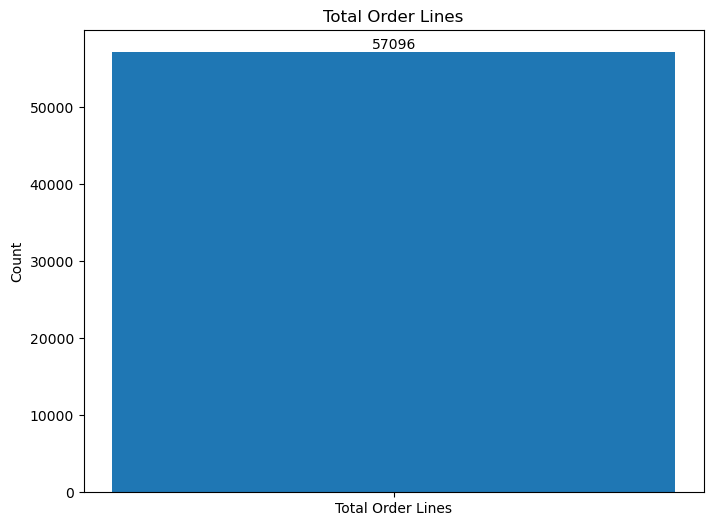

In [44]:
import matplotlib.pyplot as plt

# Compute the count of all order lines
total_order_lines = len(order_lines)

# Visualize the count
plt.figure(figsize=(8, 6))
plt.bar(["Total Order Lines"], [total_order_lines])
plt.title('Total Order Lines')
plt.ylabel('Count')

# Add the exact number on the bar
plt.text("Total Order Lines", total_order_lines, str(total_order_lines), ha='center', va='bottom')

plt.show()


#### Line Fill Rate

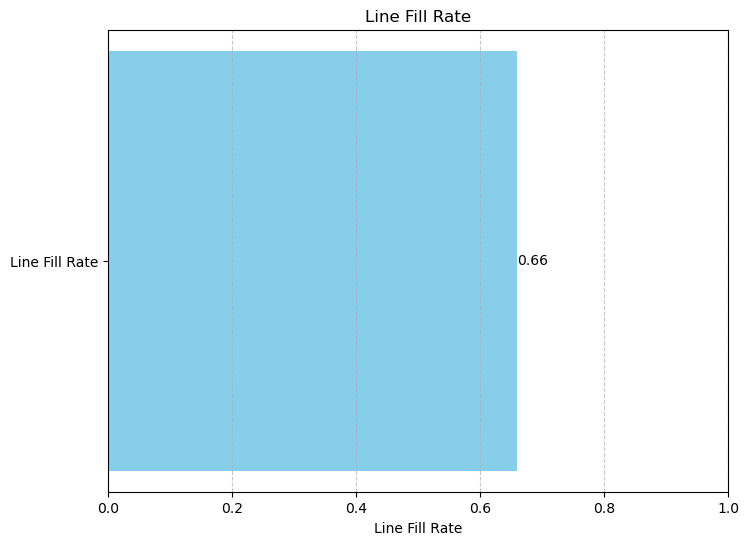

In [45]:

# Compute Line Fill Rate
total_order_lines = len(order_lines)
shipped_in_full = order_lines['In Full'].sum()
line_fill_rate = shipped_in_full / total_order_lines

# Visualize Line Fill Rate using a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(["Line Fill Rate"], [line_fill_rate], color='skyblue')
plt.xlim(0, 1)  # Set x-axis limits to ensure Line Fill Rate is between 0 and 1
plt.xlabel('Line Fill Rate')
plt.title('Line Fill Rate')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add the exact Line Fill Rate value on the bar
plt.text(line_fill_rate, "Line Fill Rate", str(round(line_fill_rate, 2)), ha='left', va='center')

plt.show()


#### Volume Fill Rate

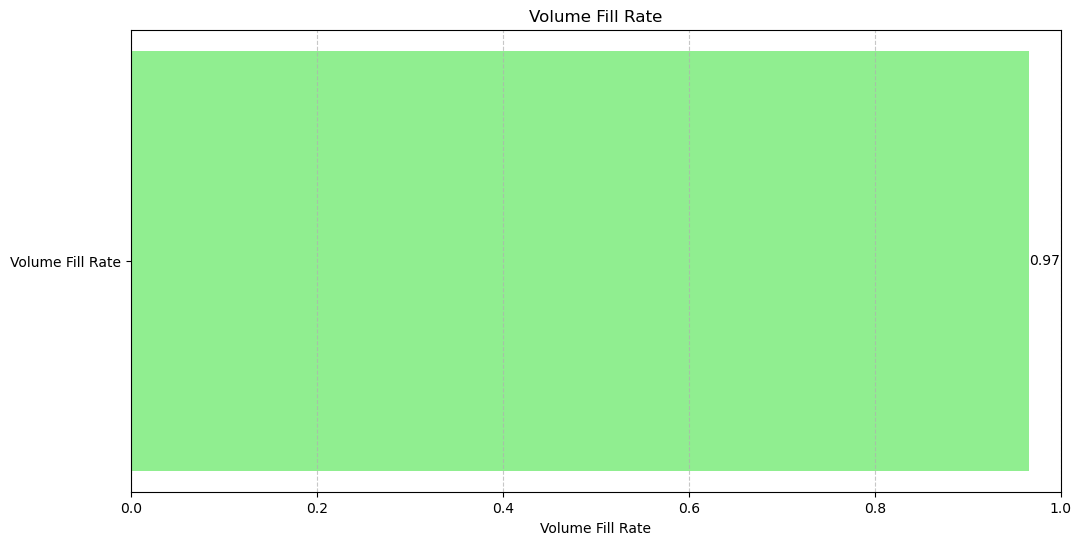

In [46]:

# Calculate Volume Fill Rate
total_quantity_ordered = order_lines['order_qty'].sum()
total_quantity_shipped = order_lines['delivery_qty'].sum()
volume_fill_rate = total_quantity_shipped / total_quantity_ordered

# Visualize Volume Fill Rate using a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(["Volume Fill Rate"], [volume_fill_rate], color='lightgreen')
plt.xlim(0, 1)  # Set x-axis limits to ensure Volume Fill Rate is between 0 and 1
plt.xlabel('Volume Fill Rate')
plt.title('Volume Fill Rate')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add the exact Volume Fill Rate value on the bar
plt.text(volume_fill_rate, "Volume Fill Rate", str(round(volume_fill_rate, 2)), ha='left', va='center')

plt.show()


Text(0.5, 1.0, 'Volume Fill Rate vs Line Fill Rate')

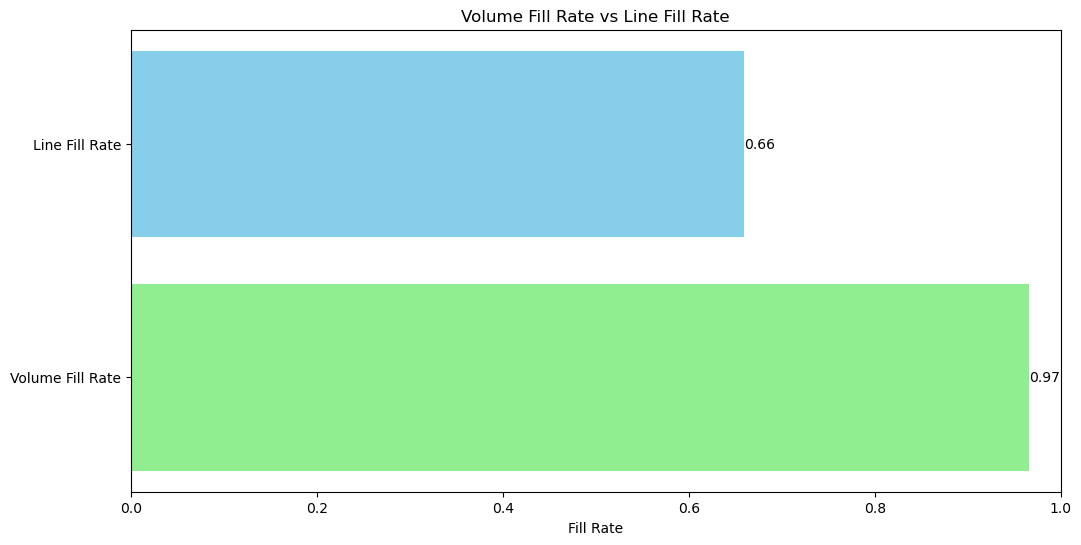

In [47]:


# Calculate Volume Fill Rate
total_quantity_ordered = order_lines['order_qty'].sum()
total_quantity_shipped = order_lines['delivery_qty'].sum()
volume_fill_rate = total_quantity_shipped / total_quantity_ordered

# Compute Line Fill Rate
total_order_lines = len(order_lines)
shipped_in_full = order_lines['In Full'].sum()
line_fill_rate = shipped_in_full / total_order_lines

# Plotting both Volume Fill Rate and Line Fill Rate in the same graph
plt.figure(figsize=(12, 6))

# Plot Volume Fill Rate
plt.barh(["Volume Fill Rate"], [volume_fill_rate], color='lightgreen', label='Volume Fill Rate')
plt.text(volume_fill_rate, "Volume Fill Rate", str(round(volume_fill_rate, 2)), ha='left', va='center')

# Plot Line Fill Rate
plt.barh(["Line Fill Rate"], [line_fill_rate], color='skyblue', label='Line Fill Rate')
plt.text(line_fill_rate, "Line Fill Rate", str(round(line_fill_rate, 2)), ha='left', va='center')

# Set x-axis limits to ensure both rates are between 0 and 1
plt.xlim(0, 1)  

# Set labels and title
plt.xlabel('Fill Rate')
plt.title('Volume Fill Rate vs Line Fill Rate')


#### On time delivery 

In [48]:

result = orders_aggregate.groupby('order_id').agg({
    'customer_id': 'first',  # Assuming 'customer_id' doesn't change within each order_id
    'order_placement_date': 'first',  # Assuming 'order_placement_date' doesn't change within each order_id
    'on_time': 'count'  # Count of occurrences of on_time for each order_id
}).reset_index()  # Resetting index to make order_id a column again

# Print the first few rows of the result
print(result.head())


       order_id  customer_id order_placement_date  on_time
0  FAP410101302       789101            08-Apr-22        1
1  FAP410101402       789101            07-Apr-22        1
2  FAP410101502       789101            09-Apr-22        1
3  FAP410101603       789101            08-Apr-22        1
4  FAP410102101       789102            07-Apr-22        1


In [49]:
print(orders_aggregate['on_time'].unique())

[1 0]


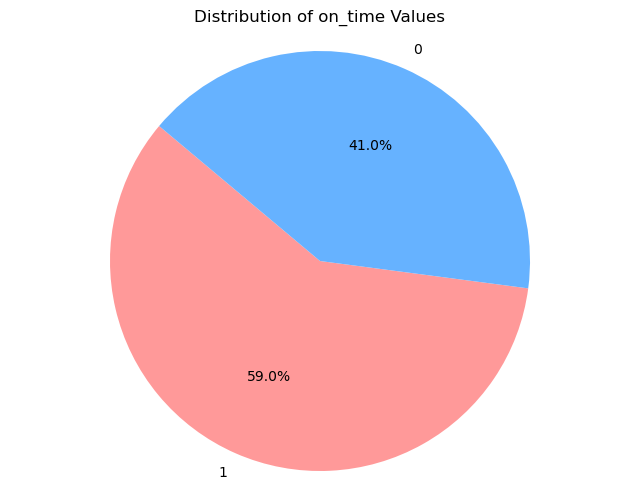

In [50]:
import matplotlib.pyplot as plt

# Assuming orders_aggregate is your DataFrame containing the data
# Extract unique values of 'on_time'
on_time_values = orders_aggregate['on_time'].unique()

# Count the occurrences of each unique value
on_time_counts = orders_aggregate['on_time'].value_counts()

# Define pastel colors
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plotting the pie chart with pastel colors
plt.figure(figsize=(8, 6))
plt.pie(on_time_counts, labels=on_time_values, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('Distribution of on_time Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### In full delivery

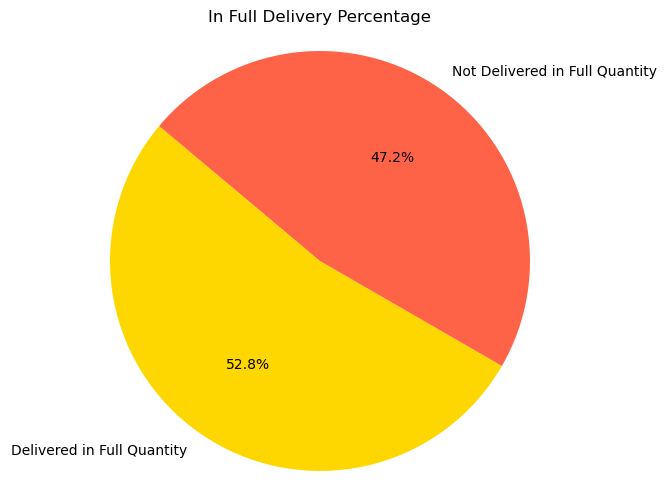

In [51]:

# Calculate the number of orders delivered in full quantity
full_delivery_orders = orders_aggregate['in_full'].sum()

# Total number of orders
total_orders = len(orders_aggregate)

# Calculate the percentage of orders delivered in full quantity
in_full_delivery_percentage = (full_delivery_orders / total_orders) * 100

# Define pastel colors for the pie chart
pastel_colors = ['#FFD700', '#FF6347']

# Visualize In Full Delivery % using a pie chart with pastel colors
plt.figure(figsize=(8, 6))
plt.pie([full_delivery_orders, total_orders - full_delivery_orders],
        labels=['Delivered in Full Quantity', 'Not Delivered in Full Quantity'],
        autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('In Full Delivery Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


#### On Time In Full

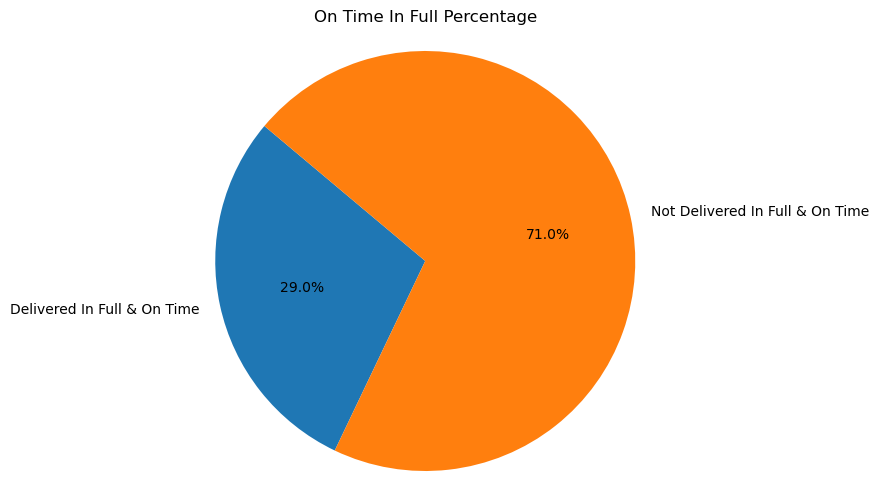

In [52]:

# Calculate the number of orders delivered both in full quantity and on time
on_time_in_full_orders = orders_aggregate[(orders_aggregate['in_full'] == 1) & (orders_aggregate['on_time'] == 1)].shape[0]

# Total number of orders
total_orders = len(orders_aggregate)

# Calculate the percentage of orders delivered both in full quantity and on time
on_time_in_full_percentage = (on_time_in_full_orders / total_orders) * 100

# Visualize On Time In Full % using a pie chart
plt.figure(figsize=(8, 6))
plt.pie([on_time_in_full_orders, total_orders - on_time_in_full_orders],
        labels=['Delivered In Full & On Time', 'Not Delivered In Full & On Time'],
        autopct='%1.1f%%', startangle=140)
plt.title('On Time In Full Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


#### On Time Target 

In [53]:
targets_orders.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


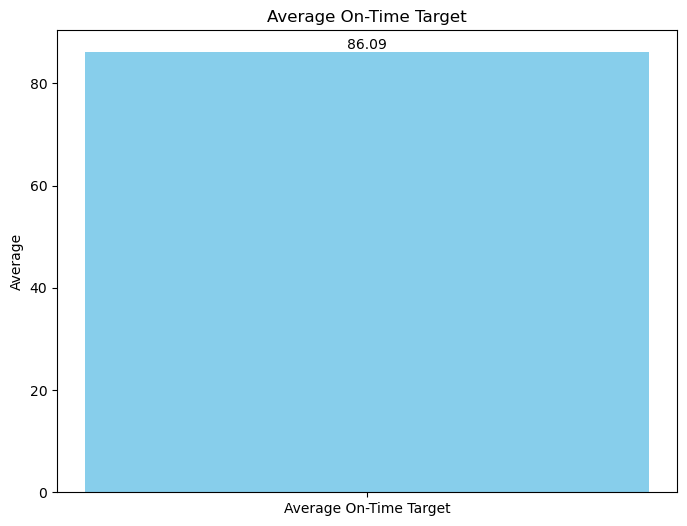

In [54]:

# Calculate the average of the "On-Time Target"
average_on_time_target = targets_orders['ontime_target%'].mean()

# Visualize the average On-Time Target using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(["Average On-Time Target"], [average_on_time_target], color='skyblue')
plt.title('Average On-Time Target')
plt.ylabel('Average')

# Add the exact number on the bar
plt.text("Average On-Time Target", average_on_time_target, str(round(average_on_time_target, 2)), ha='center', va='bottom')

plt.show()


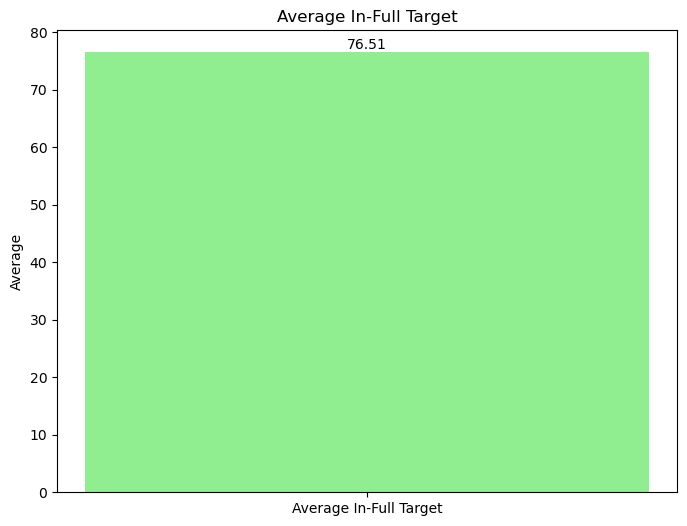

In [55]:

# Calculate the average of the "In-Full Target"
average_in_full_target = targets_orders['infull_target%'].mean()

# Visualize the average In-Full Target using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(["Average In-Full Target"], [average_in_full_target], color='lightgreen')
plt.title('Average In-Full Target')
plt.ylabel('Average')

# Add the exact number on the bar
plt.text("Average In-Full Target", average_in_full_target, str(round(average_in_full_target, 2)), ha='center', va='bottom')

plt.show()


#### On Time In Full Target 

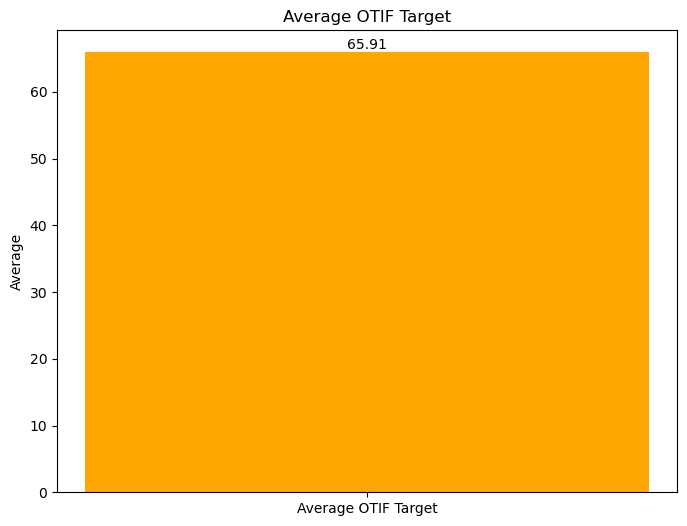

In [56]:

# Calculate the average of the "OTIF Target"
average_otif_target = targets_orders['otif_target%'].mean()

# Visualize the average OTIF Target using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(["Average OTIF Target"], [average_otif_target], color='orange')
plt.title('Average OTIF Target')
plt.ylabel('Average')

# Add the exact number on the bar
plt.text("Average OTIF Target", average_otif_target, str(round(average_otif_target, 2)), ha='center', va='bottom')

plt.show()


#### DID 

In [57]:


# Convert date columns to datetime if they are not already in datetime format
order_lines['agreed_delivery_date'] = pd.to_datetime(order_lines['agreed_delivery_date'])
order_lines['actual_delivery_date'] = pd.to_datetime(order_lines['actual_delivery_date'])

# Calculate Delay in Delivery (DID)
order_lines['delay_in_delivery'] = (order_lines['actual_delivery_date'] - order_lines['agreed_delivery_date']).dt.days

# Show the DataFrame with Delay in Delivery (DID)
print(order_lines[['order_id', 'agreed_delivery_date', 'actual_delivery_date', 'delay_in_delivery']])


            order_id agreed_delivery_date actual_delivery_date  \
0        FMR33501401           2022-03-03           2022-03-03   
1        FMR32101601           2022-03-02           2022-03-02   
2        FMR33101403           2022-03-03           2022-03-03   
3        FMR32703401           2022-03-02           2022-03-02   
4        FMR33321602           2022-03-03           2022-03-03   
...              ...                  ...                  ...   
57091  FAUG831402603           2022-08-31           2022-08-31   
57092  FAUG831902603           2022-08-31           2022-08-31   
57093  FAUG831702603           2022-08-31           2022-09-01   
57094  FAUG831321603           2022-08-31           2022-08-31   
57095  FAUG831721603           2022-08-31           2022-08-31   

       delay_in_delivery  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
57091             

In [58]:
number_of_late_delieveries =  order_lines['delay_in_delivery'].mean()

In [59]:
number_of_late_delieveries

0.4241978422306291

In [60]:
order_lines

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,product_name,category,target_word,delay_in_delivery
0,FMR33501401,"Tuesday, March 1, 2022",789501,25891101,484,2022-03-03,2022-03-03,484,1,1,1,AM Milk 500,Dairy,Milk,0
1,FMR32101601,"Tuesday, March 1, 2022",789101,25891101,474,2022-03-02,2022-03-02,474,1,1,1,AM Milk 500,Dairy,Milk,0
2,FMR33101403,"Tuesday, March 1, 2022",789101,25891101,349,2022-03-03,2022-03-03,349,1,1,1,AM Milk 500,Dairy,Milk,0
3,FMR32703401,"Tuesday, March 1, 2022",789703,25891101,492,2022-03-02,2022-03-02,492,1,1,1,AM Milk 500,Dairy,Milk,0
4,FMR33321602,"Tuesday, March 1, 2022",789321,25891101,345,2022-03-03,2022-03-03,345,1,1,1,AM Milk 500,Dairy,Milk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57091,FAUG831402603,"Tuesday, August 30, 2022",789402,25891603,111,2022-08-31,2022-08-31,111,1,1,1,AM Tea 100,beverages,Tea,0
57092,FAUG831902603,"Tuesday, August 30, 2022",789902,25891603,158,2022-08-31,2022-08-31,158,1,1,1,AM Tea 100,beverages,Tea,0
57093,FAUG831702603,"Tuesday, August 30, 2022",789702,25891603,106,2022-08-31,2022-09-01,95,0,0,0,AM Tea 100,beverages,Tea,1
57094,FAUG831321603,"Tuesday, August 30, 2022",789321,25891603,93,2022-08-31,2022-08-31,93,1,1,1,AM Tea 100,beverages,Tea,0


In [61]:

# Assuming you have a DataFrame 'order_lines' containing order data with timestamps
# For example:
# order_lines = pd.read_csv('order_lines.csv')

# Convert date columns to datetime
date_columns = ['order_placement_date', 'actual_delivery_date']
order_lines[date_columns] = order_lines[date_columns].apply(pd.to_datetime)

# Calculate COCT
order_lines['coct'] = order_lines['actual_delivery_date'] - order_lines['order_placement_date']

# Calculate average COCT
average_coct = order_lines['coct'].mean()

print("Average Customer Order Cycle Time (COCT):", average_coct)


Average Customer Order Cycle Time (COCT): 2 days 10:11:34.577553593


In [62]:
# Assuming you have a DataFrame 'order_lines' containing order data with timestamps
# For example:
# order_lines = pd.read_csv('order_lines.csv')

# Convert date columns to datetime
date_columns = ['order_placement_date', 'actual_delivery_date']
order_lines[date_columns] = order_lines[date_columns].apply(pd.to_datetime)

# Calculate COCT
order_lines['coct'] = (order_lines['actual_delivery_date'] - order_lines['order_placement_date'])

order_lines

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,product_name,category,target_word,delay_in_delivery,coct
0,FMR33501401,2022-03-01,789501,25891101,484,2022-03-03,2022-03-03,484,1,1,1,AM Milk 500,Dairy,Milk,0,2 days
1,FMR32101601,2022-03-01,789101,25891101,474,2022-03-02,2022-03-02,474,1,1,1,AM Milk 500,Dairy,Milk,0,1 days
2,FMR33101403,2022-03-01,789101,25891101,349,2022-03-03,2022-03-03,349,1,1,1,AM Milk 500,Dairy,Milk,0,2 days
3,FMR32703401,2022-03-01,789703,25891101,492,2022-03-02,2022-03-02,492,1,1,1,AM Milk 500,Dairy,Milk,0,1 days
4,FMR33321602,2022-03-01,789321,25891101,345,2022-03-03,2022-03-03,345,1,1,1,AM Milk 500,Dairy,Milk,0,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57091,FAUG831402603,2022-08-30,789402,25891603,111,2022-08-31,2022-08-31,111,1,1,1,AM Tea 100,beverages,Tea,0,1 days
57092,FAUG831902603,2022-08-30,789902,25891603,158,2022-08-31,2022-08-31,158,1,1,1,AM Tea 100,beverages,Tea,0,1 days
57093,FAUG831702603,2022-08-30,789702,25891603,106,2022-08-31,2022-09-01,95,0,0,0,AM Tea 100,beverages,Tea,1,2 days
57094,FAUG831321603,2022-08-30,789321,25891603,93,2022-08-31,2022-08-31,93,1,1,1,AM Tea 100,beverages,Tea,0,1 days


#### Analytics

LIFR

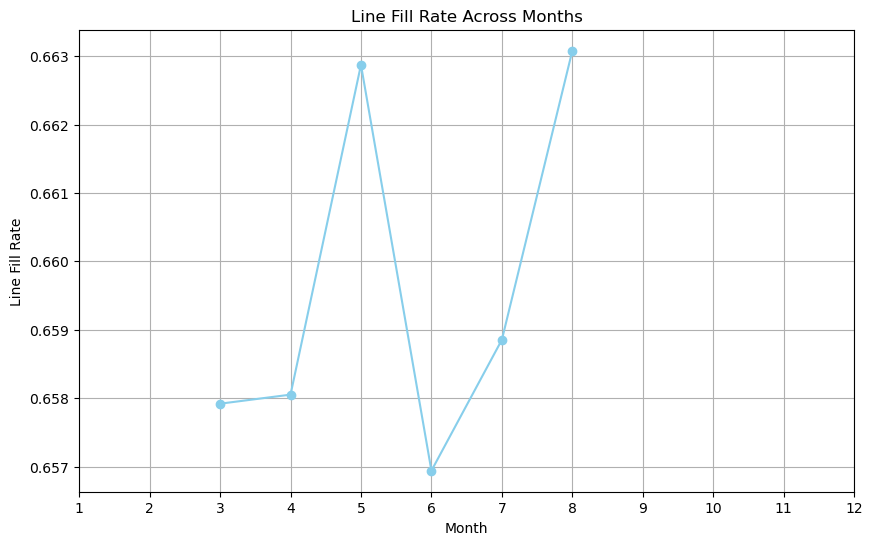

In [63]:
# Assuming you have a DataFrame 'order_lines' containing order data with timestamps
# For example:
# order_lines = pd.read_csv('order_lines.csv')

# Convert date columns to datetime
date_columns = ['order_placement_date', 'actual_delivery_date']
order_lines[date_columns] = order_lines[date_columns].apply(pd.to_datetime)

# Extract month from the order placement date
order_lines['order_placement_month'] = order_lines['order_placement_date'].dt.month

# Compute Line Fill Rate for each month
line_fill_rate_per_month = order_lines.groupby('order_placement_month')['In Full'].mean()

# Plot Line Fill Rate as a line chart
plt.figure(figsize=(10, 6))
line_fill_rate_per_month.plot(marker='o', color='skyblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Line Fill Rate')
plt.title('Line Fill Rate Across Months')
plt.grid(True)
plt.xticks(range(1, 13))  # Assuming 1 to 12 represent months
plt.show()


VOFR

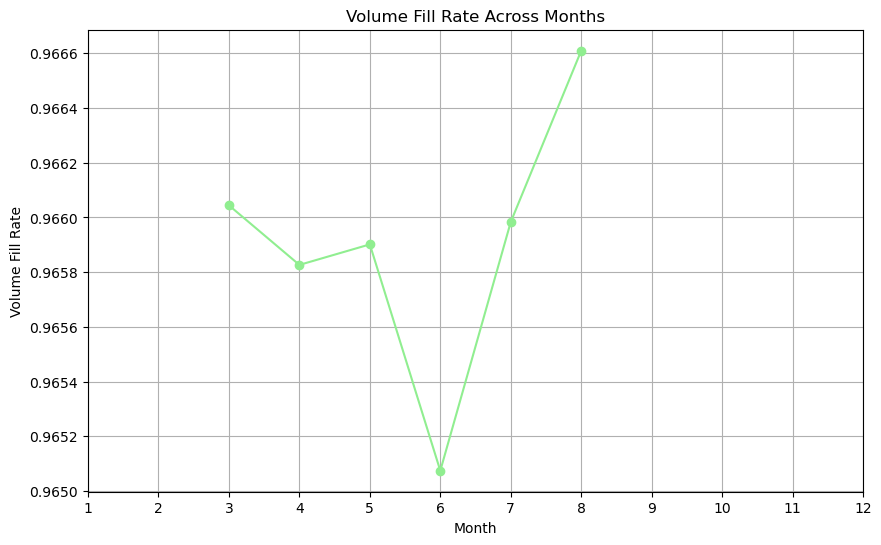

In [64]:
# Calculate Volume Fill Rate for each month
volume_fill_rate_per_month = order_lines.groupby('order_placement_month')['delivery_qty'].sum() / order_lines.groupby('order_placement_month')['order_qty'].sum()

# Plot Volume Fill Rate as a line chart
plt.figure(figsize=(10, 6))
volume_fill_rate_per_month.plot(marker='o', color='lightgreen', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Volume Fill Rate')
plt.title('Volume Fill Rate Across Months')
plt.grid(True)
plt.xticks(range(1, 13))  # Assuming 1 to 12 represent months
plt.show()


In [65]:
orders_aggregate.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0


IF

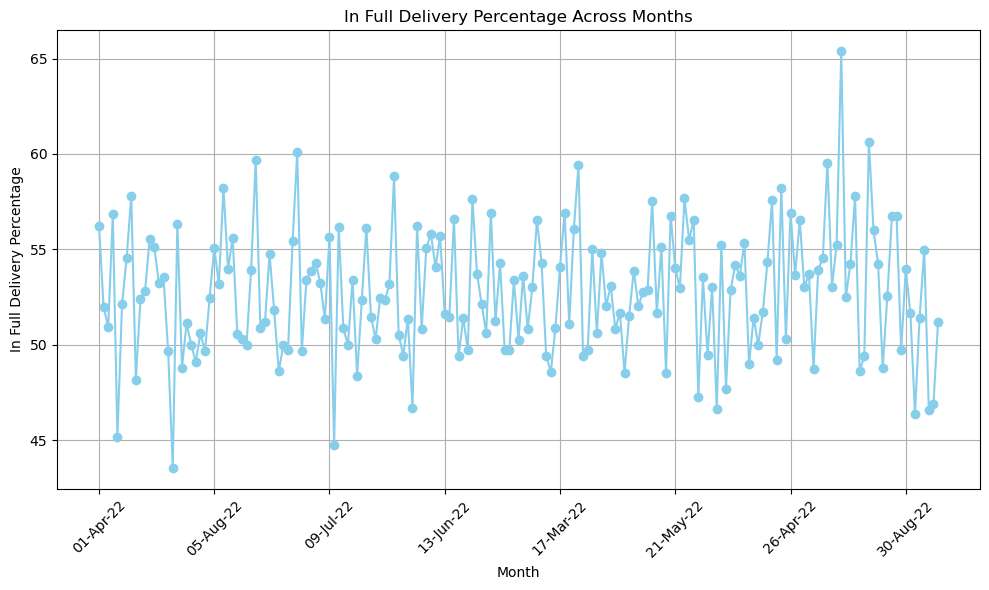

In [66]:
# Calculate the number of orders delivered in full quantity per month
full_delivery_orders_per_month = orders_aggregate.groupby('order_placement_date')['in_full'].sum()

# Calculate the total number of orders per month
total_orders_per_month = orders_aggregate.groupby('order_placement_date').size()

# Calculate the percentage of orders delivered in full quantity per month
in_full_delivery_percentage_per_month = (full_delivery_orders_per_month / total_orders_per_month) * 100

# Visualize In Full Delivery % per month using a line graph
plt.figure(figsize=(10, 6))
in_full_delivery_percentage_per_month.plot(kind='line', marker='o', color='skyblue')
plt.title('In Full Delivery Percentage Across Months')
plt.xlabel('Month')
plt.ylabel('In Full Delivery Percentage')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


OT

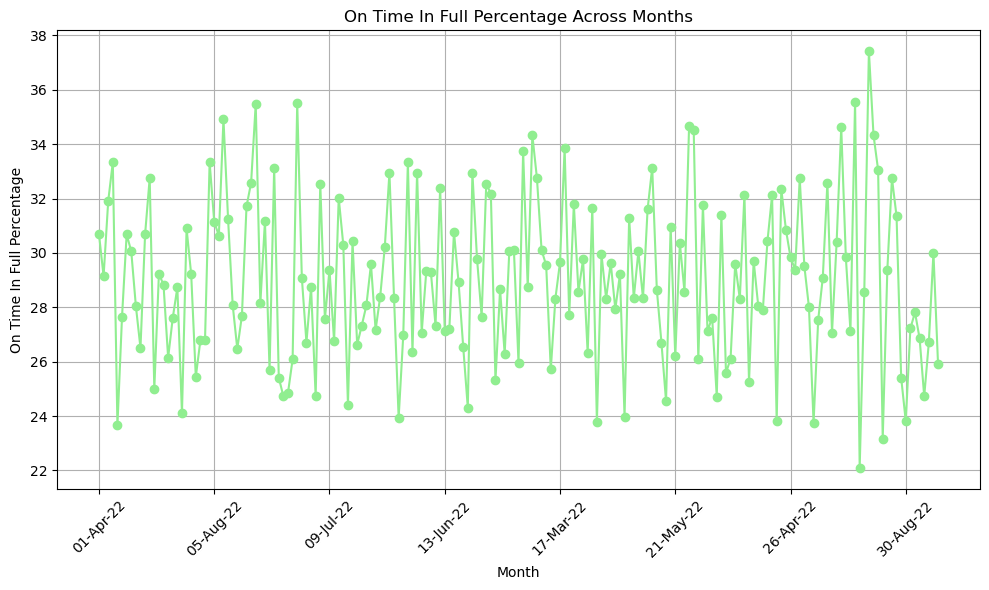

In [67]:
# Calculate the number of orders delivered both in full quantity and on time per month
on_time_in_full_orders_per_month = orders_aggregate[(orders_aggregate['in_full'] == 1) & (orders_aggregate['on_time'] == 1)].groupby('order_placement_date').size()

# Calculate the total number of orders per month
total_orders_per_month = orders_aggregate.groupby('order_placement_date').size()

# Calculate the percentage of orders delivered both in full quantity and on time per month
on_time_in_full_percentage_per_month = (on_time_in_full_orders_per_month / total_orders_per_month) * 100

# Visualize On Time In Full % per month using a line graph
plt.figure(figsize=(10, 6))
on_time_in_full_percentage_per_month.plot(kind='line', marker='o', color='lightgreen')
plt.title('On Time In Full Percentage Across Months')
plt.xlabel('Month')
plt.ylabel('On Time In Full Percentage')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


OTIF

In [68]:
targets_orders.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [69]:
# Assuming you have DataFrames target_orders and order_lines
# Merge the DataFrames based on customer_id
merged_data = pd.merge(order_lines, targets_orders, on='customer_id', how='inner')

# Now merged_data contains the merged DataFrame


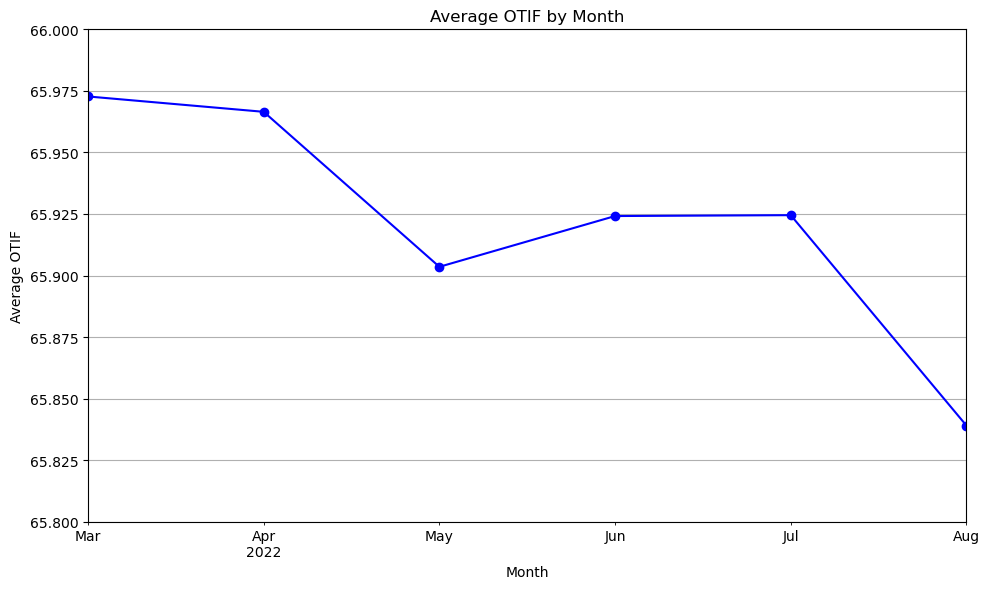

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is your merged DataFrame containing both order_lines and target_orders
# Convert date columns to datetime if they are not already
merged_data['order_placement_date'] = pd.to_datetime(merged_data['order_placement_date'])

# Extract month from order_placement_date
merged_data['order_placement_month'] = merged_data['order_placement_date'].dt.to_period('M')


# Calculate OTIF for each month
otif_per_month = merged_data.groupby('order_placement_month')['otif_target%'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
otif_per_month.plot(marker='o', color='b', linestyle='-')
plt.title('Average OTIF by Month')
plt.xlabel('Month')
plt.ylabel('Average OTIF')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis limits manually to make the changes more apparent
plt.ylim(65.8, 66)  # Adjust these limits according to your data
plt.tight_layout()
plt.show()


In [71]:
order_lines

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,product_name,category,target_word,delay_in_delivery,coct,order_placement_month
0,FMR33501401,2022-03-01,789501,25891101,484,2022-03-03,2022-03-03,484,1,1,1,AM Milk 500,Dairy,Milk,0,2 days,3
1,FMR32101601,2022-03-01,789101,25891101,474,2022-03-02,2022-03-02,474,1,1,1,AM Milk 500,Dairy,Milk,0,1 days,3
2,FMR33101403,2022-03-01,789101,25891101,349,2022-03-03,2022-03-03,349,1,1,1,AM Milk 500,Dairy,Milk,0,2 days,3
3,FMR32703401,2022-03-01,789703,25891101,492,2022-03-02,2022-03-02,492,1,1,1,AM Milk 500,Dairy,Milk,0,1 days,3
4,FMR33321602,2022-03-01,789321,25891101,345,2022-03-03,2022-03-03,345,1,1,1,AM Milk 500,Dairy,Milk,0,2 days,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57091,FAUG831402603,2022-08-30,789402,25891603,111,2022-08-31,2022-08-31,111,1,1,1,AM Tea 100,beverages,Tea,0,1 days,8
57092,FAUG831902603,2022-08-30,789902,25891603,158,2022-08-31,2022-08-31,158,1,1,1,AM Tea 100,beverages,Tea,0,1 days,8
57093,FAUG831702603,2022-08-30,789702,25891603,106,2022-08-31,2022-09-01,95,0,0,0,AM Tea 100,beverages,Tea,1,2 days,8
57094,FAUG831321603,2022-08-30,789321,25891603,93,2022-08-31,2022-08-31,93,1,1,1,AM Tea 100,beverages,Tea,0,1 days,8


Machine learning 

In [72]:
order_line = pd.read_csv('fact_order_lines.csv', header=0, index_col="order_placement_date", parse_dates=True).squeeze("columns")

In [73]:
ml = order_line[['order_qty']].copy()

# Aggregate the quantities ordered on the same day directly in the DataFrame
ml_agg = ml.resample('D').sum()

# Display the aggregated DataFrame
print(ml_agg)

                      order_qty
order_placement_date           
2022-03-01                78515
2022-03-02                74500
2022-03-03                69030
2022-03-04                74469
2022-03-05                73464
...                         ...
2022-08-26                79548
2022-08-27                69043
2022-08-28                76489
2022-08-29                51119
2022-08-30                25569

[183 rows x 1 columns]


In [74]:
ml_agg.index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10',
               ...
               '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30'],
              dtype='datetime64[ns]', name='order_placement_date', length=183, freq='D')

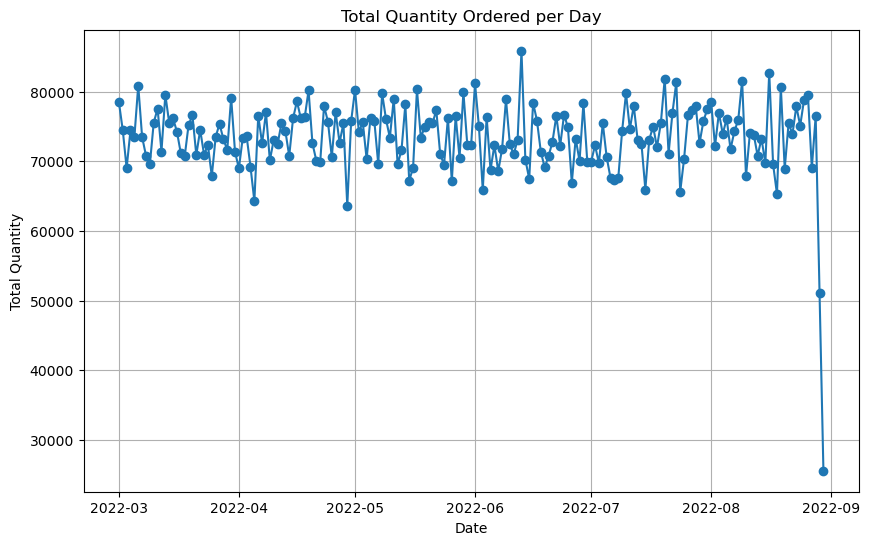

In [75]:

# Plot the aggregated quantity over time
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(ml_agg.index, ml_agg['order_qty'], marker='o', linestyle='-')

# Customize labels and title
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Ordered per Day')

# Enable grid
plt.grid(True)

# Show the plot
plt.show()


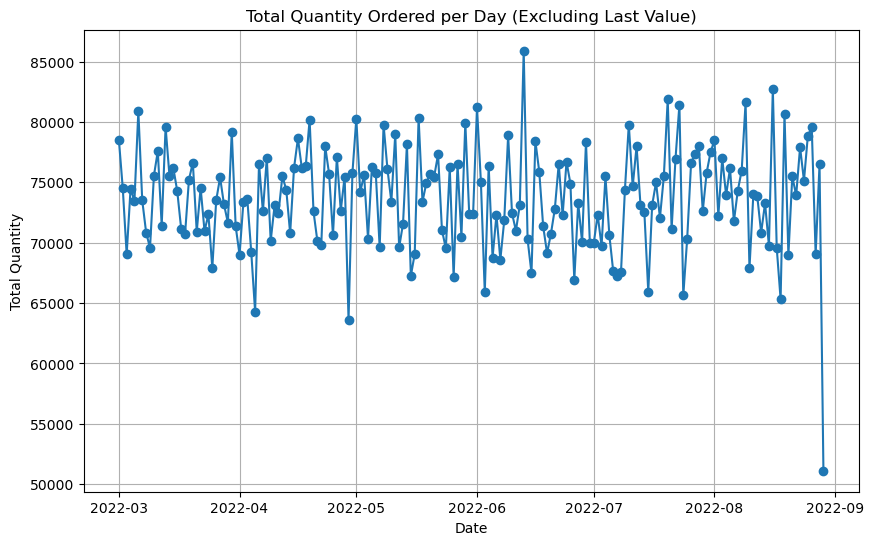

In [76]:
# Drop the last value from ml_agg
ml_agg = ml_agg.iloc[:-1]

# Plot the aggregated quantity over time
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(ml_agg.index, ml_agg['order_qty'], marker='o', linestyle='-')

# Customize labels and title
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Ordered per Day (Excluding Last Value)')

# Enable grid
plt.grid(True)

# Show the plot
plt.show()

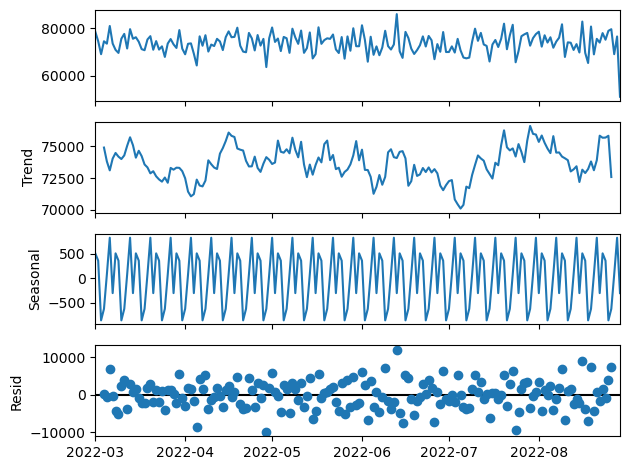

In [78]:
# Applying seasonal decomposition to the time series airpass
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ml_agg)
 
# Calling the plot method on the decomposition object
decomposition.plot()
 
# Displaying the graph
plt.show()

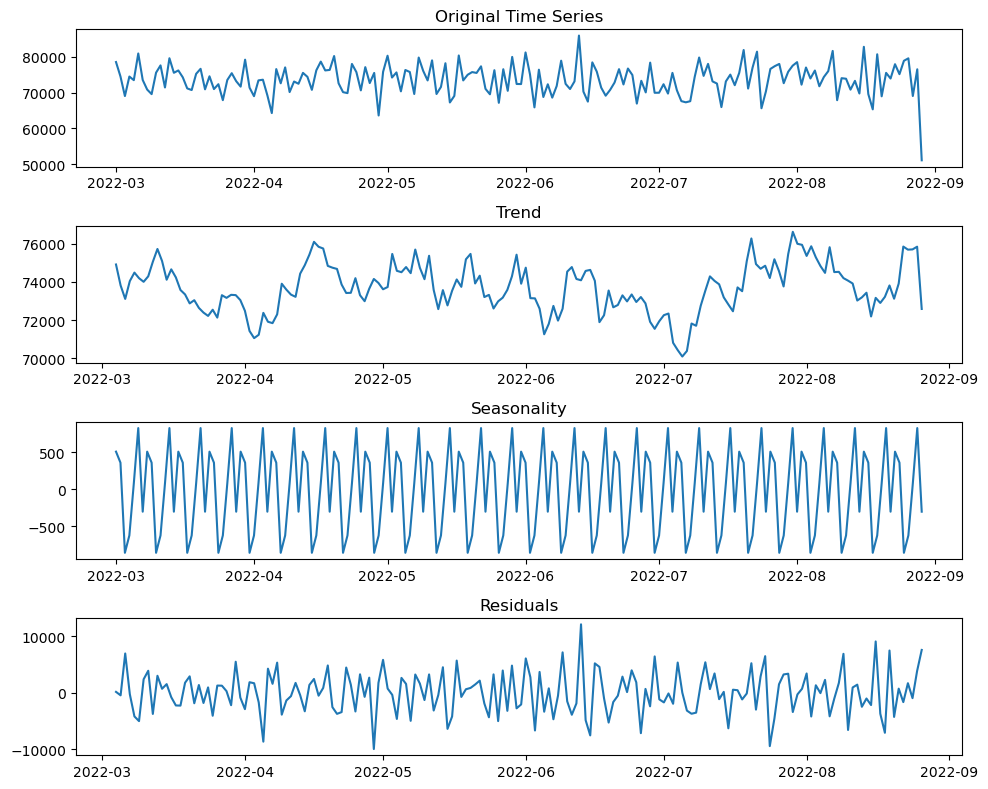

In [79]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming your time series data is stored in a DataFrame called 'data' with a datetime index

# Perform additive decomposition
result = seasonal_decompose(ml_agg, model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(ml_agg)
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()


In [80]:
ml_agg_log = np.log(ml_agg)
ml_agg_log


,order_qty
order_placement_date,
2022-03-01,11.271045
2022-03-02,11.218554
2022-03-03,11.142296
2022-03-04,11.218138
2022-03-05,11.204551
...,...
2022-08-25,11.275505
2022-08-26,11.284116
2022-08-27,11.142485


<Figure size 3000x600 with 0 Axes>

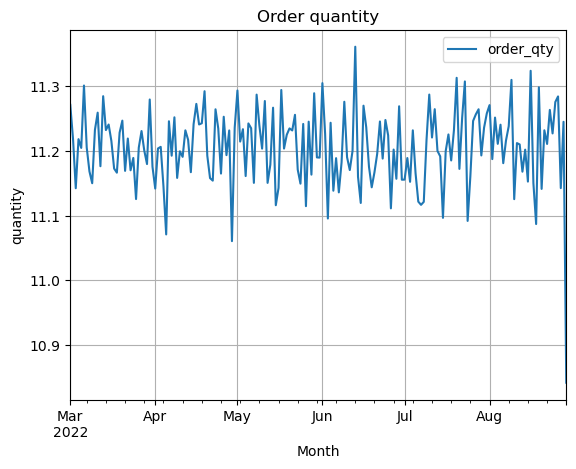

In [81]:
plt.figure(figsize=(30, 6))  # Set figure size
ml_agg_log.plot()
plt.xlabel('Month')
plt.ylabel('quantity')
plt.title('Order quantity')
plt.grid(True)
plt.show()

In [82]:
'''

# Here we use the log transform we are therefore in an additive model.

add = seasonal_decompose(ml_agg_log)

# Seasonal coefficients are subtracted from the airpasslog series

cvs = ml_agg_log - add.seasonal

# Let's go to the exponential to find the original series.

x_cvs = np.exp(cvs)

# We show the series

plt.plot(ml_agg, label = 'Original series')

plt.plot(x_cvs, label = 'Corrected series') 

plt.title('Original series graph and corrected series')

plt.xlabel('Date')

plt.ylabel('Quantity')

plt.legend()
'''

"\n\n# Here we use the log transform we are therefore in an additive model.\n\nadd = seasonal_decompose(ml_agg_log)\n\n# Seasonal coefficients are subtracted from the airpasslog series\n\ncvs = ml_agg_log - add.seasonal\n\n# Let's go to the exponential to find the original series.\n\nx_cvs = np.exp(cvs)\n\n# We show the series\n\nplt.plot(ml_agg, label = 'Original series')\n\nplt.plot(x_cvs, label = 'Corrected series') \n\nplt.title('Original series graph and corrected series')\n\nplt.xlabel('Date')\n\nplt.ylabel('Quantity')\n\nplt.legend()\n"

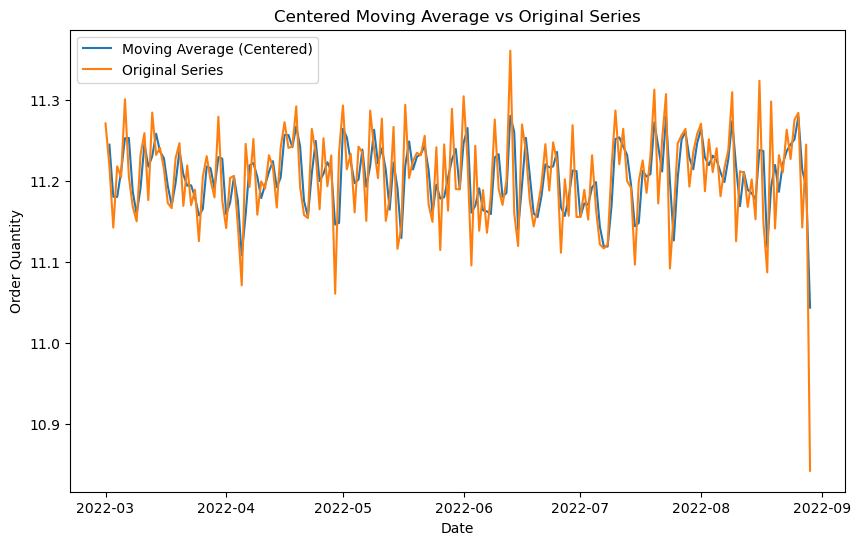

In [83]:
# Calculate the centered moving average over 2 months
ml_ma = ml_agg_log.rolling(window=2, center=True).mean()

# Plot the moving average and the original series on the same graph
plt.figure(figsize=(10, 6))
plt.plot(ml_ma.index, ml_ma['order_qty'], label='Moving Average (Centered)')
plt.plot(ml_agg_log.index, ml_agg_log['order_qty'], label='Original Series')
plt.title('Centered Moving Average vs Original Series')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.show()

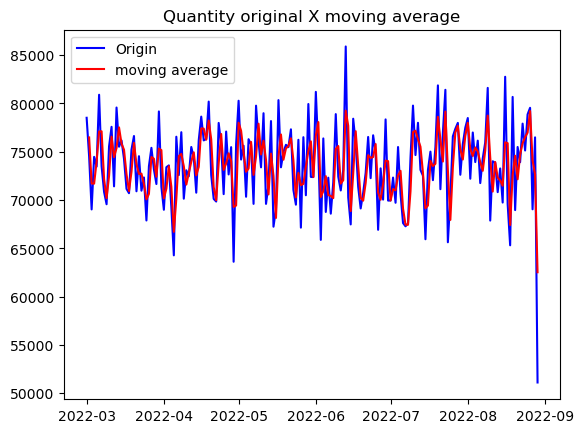

In [84]:
plt.plot(np.exp(ml_agg_log), color='blue', label='Origin')

plt.plot(np.exp(ml_ma), color='red', label='moving average')

plt.legend()

plt.title('Quantity original X moving average')

plt.show()

The time series doesn't exhibit any specefic trend 

In [85]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Split the data into training and testing sets
train_size = int(len(ml_agg) * 0.8)  # 80% of data for training
train, test = ml_agg.iloc[:train_size], ml_agg.iloc[train_size:]


### Simple Moving Average

In [86]:
# Define the window size for the moving average
window_size = 5

# Define the number of splits for cross-validation
n_splits = 5

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize list to store MAE for each fold
sma_mae_list = []

# Iterate over each fold for cross-validation
for fold, (train_index, test_index) in enumerate(tscv.split(ml_agg), 1):
    # Split the data into train and test sets
    train, test = ml_agg.iloc[train_index], ml_agg.iloc[test_index]

    # Extract the target variable for each fold
    y_train = train['order_qty']
    y_test = test['order_qty']

    # Compute the moving average for the training set
    train_moving_avg = y_train.rolling(window=window_size).mean()

    # Make predictions for September and October
    sept_prediction = train_moving_avg.iloc[-1]
    oct_prediction = train_moving_avg.iloc[-1]  # Simple Moving Average doesn't use future data, so we use the same value for both months

    # Create arrays for the predicted values
    sma_predictions = np.array([sept_prediction, oct_prediction])

    # Extract the actual values for September and October
    actual_values = np.array([y_test.iloc[0], y_test.iloc[1]])

    # Evaluate the model for the current fold
    sma_mae = mean_absolute_error(actual_values, sma_predictions)
    
    # Append MAE to the list for each fold
    sma_mae_list.append(sma_mae)

    # Print MAE for the current fold
    print(f'Fold {fold} MAE: {sma_mae}')
    print(f'Predictions for fold {fold}: {sma_predictions}')
    print(f'Actual values for fold {fold}: {actual_values}\n')

# Print the list of MAE for each fold
print("Mean Absolute Error for each fold:", sma_mae_list)

# Calculate the mean MAE across all folds
sma_mean_mae = np.mean(sma_mae_list)
print(f'SMA Mean Absolute Error across {n_splits} folds: {sma_mean_mae}')
sma_accuracy = 1 - sma_mean_mae / ml_agg['order_qty'].mean()
print(f'SMA Accuracy Score: {sma_accuracy}')


Fold 1 MAE: 620.3999999999942
Predictions for fold 1: [72872.6 72872.6]
Actual values for fold 1: [73399 73587]

Fold 2 MAE: 1344.6000000000058
Predictions for fold 2: [73561.4 73561.4]
Actual values for fold 2: [74191 75621]

Fold 3 MAE: 3787.0
Predictions for fold 3: [74343. 74343.]
Actual values for fold 3: [81197 75063]

Fold 4 MAE: 1185.0
Predictions for fold 4: [71708. 71708.]
Actual values for fold 4: [69956 72326]

Fold 5 MAE: 1916.0
Predictions for fold 5: [76074. 76074.]
Actual values for fold 5: [77492 78488]

Mean Absolute Error for each fold: [620.3999999999942, 1344.6000000000058, 3787.0, 1185.0, 1916.0]
SMA Mean Absolute Error across 5 folds: 1770.6
SMA Accuracy Score: 0.9759540052891619


In [87]:
# Define the window size for Simple Moving Average (SMA)
sma_window_size = 5  # Adjust as needed

# Calculate Simple Moving Average (SMA) for the last few observations
sma_forecast = ml_agg['order_qty'].rolling(window=sma_window_size).mean().iloc[-1]

# Print the forecasted value for September using SMA
print("Forecasted value for September using SMA:")
print(f"September: {sma_forecast}")

Forecasted value for September using SMA:
September: 71013.0


### Weighted Moving Average 

In [88]:

# Define the weights for the moving average
weights = np.array([0.1, 0.2, 0.3, 0.2, 0.1])  # Example weights, adjust as needed

# Define the number of splits for cross-validation
n_splits = 5

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize list to store MAE for each fold
wma_mae_list = []

# Iterate over each fold for cross-validation
for fold, (train_index, test_index) in enumerate(tscv.split(ml_agg), 1):
    # Split the data into train and test sets
    train, test = ml_agg.iloc[train_index], ml_agg.iloc[test_index]

    # Extract the target variable for each fold
    y_train = train['order_qty']
    y_test = test['order_qty']

    # Compute the weighted moving average for the training set
    train_wma = np.convolve(y_train, weights, mode='valid') / np.sum(weights)  # Fix the sum call

    # Make predictions for September and October using the weighted moving average
    sept_prediction = train_wma[-1]
    oct_prediction = train_wma[-1]  # Weighted Moving Average doesn't use future data, so we use the same value for both months

    # Create arrays for the predicted values
    wma_predictions = np.array([sept_prediction, oct_prediction])

    # Extract the actual values for September and October
    actual_values = np.array([y_test.iloc[0], y_test.iloc[1]])

    # Evaluate the model for the current fold
    wma_mae = mean_absolute_error(actual_values, wma_predictions)
    
    # Append MAE to the list for each fold
    wma_mae_list.append(wma_mae)

    # Print MAE for the current fold
    print(f'Fold {fold} MAE: {wma_mae}')

# Print the list of MAE for each fold
print("Mean Absolute Error for each fold:", wma_mae_list)

# Calculate the mean MAE across all folds
wma_mean_mae = np.mean(wma_mae_list)
print(f'WMA Mean Absolute Error across {n_splits} folds: {wma_mean_mae}')
wma_accuracy = 1 - wma_mean_mae / ml_agg['order_qty'].mean()
print(f'WMA Accuracy Score: {wma_accuracy}')


Fold 1 MAE: 476.88888888887595
Fold 2 MAE: 3095.1111111111095
Fold 3 MAE: 3186.9999999999854
Fold 4 MAE: 1185.0
Fold 5 MAE: 1730.222222222219
Mean Absolute Error for each fold: [476.88888888887595, 3095.1111111111095, 3186.9999999999854, 1185.0, 1730.222222222219]
WMA Mean Absolute Error across 5 folds: 1934.844444444438
WMA Accuracy Score: 0.9737234500861824


In [89]:
weights = np.array([0.1, 0.2, 0.3, 0.2, 0.1])  # Example weights, adjust as needed

# Calculate Weighted Moving Average (WMA) for the last few observations
wma_forecast = np.convolve(ml_agg['order_qty'].values[-len(weights):], weights[::-1], mode='valid')[-1]

# Print the forecasted value for September using WMA
print("\nForecasted value for September using WMA:")
print(f"September: {wma_forecast}")


Forecasted value for September using WMA:
September: 64918.8


### ARIMA 

In [90]:
# Define the number of splits for cross-validation
n_splits = 5

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize list to store MAE for each fold
arima_mae_list = []

# Iterate over each fold for cross-validation
for train_index, test_index in tscv.split(ml_agg):
    # Split the data into train and test sets
    train, test = ml_agg.iloc[train_index], ml_agg.iloc[test_index]

    # Extract features and target variable for each fold
    X_train, y_train = train.drop(columns=['order_qty']), train['order_qty']
    X_test, y_test = test.drop(columns=['order_qty']), test['order_qty']

    # Fit ARIMA model
    arima_model = ARIMA(y_train, order=(5, 1, 0))
    arima_fit = arima_model.fit()

    # Make predictions for the current fold
    arima_predictions = arima_fit.forecast(steps=len(test))

    # Evaluate the model for the current fold
    arima_mae = mean_absolute_error(y_test, arima_predictions)
    arima_mae_list.append(arima_mae)

    # Print MAE for the current fold
    print(f'Fold MAE: {arima_mae}')

# Calculate the mean MAE across all folds
arima_mean_mae = np.mean(arima_mae_list)
print(f'ARIMA Mean Absolute Error across {n_splits} folds: {arima_mean_mae}')

# Print the list of MAE for each fold
print("ARIMA Mean Absolute Error for each fold:", arima_mae_list)

# Find the index of the best fold (i.e., the fold with the lowest MAE)
best_fold_index = np.argmin(arima_mae_list)

# Retrieve the MAE of the best fold
best_fold_mae = arima_mae_list[best_fold_index]

# Calculate the accuracy score based on the best fold
arima_accuracy = 1 - best_fold_mae / ml_agg['order_qty'].mean()

# Print the accuracy score
print(f'ARIMA Accuracy Score based on the best fold: {arima_accuracy}')


Fold MAE: 5233.729331959403
Fold MAE: 5102.945752584558
Fold MAE: 3641.853593800144
Fold MAE: 3665.467617620849
Fold MAE: 4207.462697510506
ARIMA Mean Absolute Error across 5 folds: 4370.2917986950915
ARIMA Mean Absolute Error for each fold: [5233.729331959403, 5102.945752584558, 3641.853593800144, 3665.467617620849, 4207.462697510506]
ARIMA Accuracy Score based on the best fold: 0.9505410639025387


In [91]:
from itertools import product

# Define the ranges for p, d, and q parameters
p_values = range(1, 4)
d_values = range(0, 2)
q_values = range(1, 4)

# Initialize variables to store the best model and its corresponding parameters
best_model = None
best_mae = float('inf')
best_order = None

# Iterate over all combinations of p, d, and q values
for p, d, q in product(p_values, d_values, q_values):
    # Train ARIMA model with current parameter combination
    arima_model = ARIMA(ml_agg['order_qty'], order=(p, d, q))
    arima_fit = arima_model.fit()

    # Forecast the quantity using the trained model
    arima_forecast = arima_fit.forecast(steps=len(ml_agg))

    # Evaluate the model using Mean Absolute Error
    mae = mean_absolute_error(ml_agg['order_qty'], arima_forecast)

    # Check if current model is better than the best model so far
    if mae < best_mae:
        best_mae = mae
        best_model = arima_fit
        best_order = (p, d, q)

# Print the best model parameters and corresponding MAE
print(f'Best ARIMA model parameters: {best_order}')
print(f'Best ARIMA Mean Absolute Error: {best_mae}')

/Users/dzhamilyaseysembekova/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dzhamilyaseysembekova/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/dzhamilyaseysembekova/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/dzhamilyaseysembekova/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters

Best ARIMA model parameters: (2, 0, 3)
Best ARIMA Mean Absolute Error: 3250.331486721773
